# Flipr Hackathon 5.0 Machine learning

# Stock Market Price Prediction

## Problem Statement 1: Prediction of Stock Price

## Data Analysis

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

### importing the data

In [3]:
df = pd.read_excel('cleaned_final_train_data.xlsx',sheet_name = 0)

In [4]:
df.head()

,Unnamed: 0,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,...,Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,...,0.845528,0.013351,0.472868,0.962343,156.987852,0,0,0,0,1
1,1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,...,0.700813,1.000000,0.860465,0.585774,1121.787632,0,0,0,1,0
2,2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,...,0.559350,1.000000,0.891473,0.576360,158.687016,0,0,0,1,0
3,3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,...,0.302439,0.013351,0.581395,0.899582,209.645870,0,1,0,0,0
4,4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,...,0.868293,1.000000,0.945736,0.675732,514.240811,0,0,0,1,0


In [5]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
df

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,0.962343,156.987852,0,0,0,0,1
1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,0.585774,1121.787632,0,0,0,1,0
2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,0.576360,158.687016,0,0,0,1,0
3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,0.899582,209.645870,0,1,0,0,0
4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,0.675732,514.240811,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,AC3205,S&P 500,Materials,0.741455,0.060143,0.417684,0.165675,0.548692,0.361345,0.038462,0.434146,0.013351,1.000000,0.654812,140.053671,0,0,0,1,0
6588,AC3206,NSE,Healthcare,0.825841,0.202257,0.150130,0.131620,0.855807,0.960384,1.000000,0.652033,1.000000,0.891473,0.808577,44.707999,0,1,0,0,0
6589,AC3207,NSE,Materials,0.634007,0.202257,0.103621,0.725559,0.623914,0.620648,0.038462,0.990244,1.000000,0.829457,0.550209,139.416425,0,0,0,1,0
6590,AC3208,JSE,Materials,0.345718,1.000000,0.513003,0.251038,0.936502,0.591837,0.038462,0.808130,0.236315,0.496124,0.140167,253.320730,0,0,0,1,0


In [7]:
print(df.dtypes)

Stock Index                   object
Index                         object
Industry                      object
VWAP                         float64
General Index                float64
NAV                          float64
P/E Ratio                    float64
Volumes Traded               float64
Inventory Turnover           float64
Covid Impact (Beta)          float64
Tracking Error               float64
Dollar Exchange Rate         float64
Put-Call Ratio               float64
P/B Ratio                    float64
Stock Price                  float64
Industry-Energy                int64
Industry-Healthcare            int64
Industry-Information Tech      int64
Industry-Materials             int64
Industry-Real Estate           int64
dtype: object


In [8]:
df.corr()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
VWAP,1.000000,0.001806,0.001337,-0.014163,0.005628,-0.007937,-0.017153,0.002993,-0.010343,0.006197,-0.013247,0.009690,-0.000819,-0.011931,0.000843,-0.005057,0.016950
General Index,0.001806,1.000000,0.000042,0.006474,-0.006429,0.004161,0.009685,-0.012372,0.174210,0.005554,0.009245,0.013917,-0.015060,0.016831,0.012168,-0.022879,0.009520
NAV,0.001337,0.000042,1.000000,-0.020598,-0.012041,0.008552,0.003314,0.004296,0.010885,0.011242,-0.015941,0.634212,-0.002381,0.010386,0.003000,-0.021338,0.010727
P/E Ratio,-0.014163,0.006474,-0.020598,1.000000,0.001874,-0.001450,0.002327,0.010903,-0.007816,-0.006315,-0.001495,0.682821,0.001645,-0.001537,0.000626,0.005983,-0.006817
Volumes Traded,0.005628,-0.006429,-0.012041,0.001874,1.000000,-0.003962,0.013981,-0.001757,0.001634,0.019356,0.005841,-0.007739,0.014422,0.007629,0.000136,-0.007667,-0.014444
Inventory Turnover,-0.007937,0.004161,0.008552,-0.001450,-0.003962,1.000000,0.026980,0.017804,-0.008716,0.001509,0.008603,0.006892,-0.010912,0.019541,0.008519,0.006300,-0.023282
Covid Impact (Beta),-0.017153,0.009685,0.003314,0.002327,0.013981,0.026980,1.000000,0.004728,0.008398,0.002806,0.004021,0.006326,-0.039602,0.816324,0.114970,-0.145833,-0.736994
Tracking Error,0.002993,-0.012372,0.004296,0.010903,-0.001757,0.017804,0.004728,1.000000,0.008649,0.005221,-0.016515,0.013832,0.015169,0.007821,-0.013031,-0.009659,-0.000262
Dollar Exchange Rate,-0.010343,0.174210,0.010885,-0.007816,0.001634,-0.008716,0.008398,0.008649,1.000000,0.005650,0.007131,-0.000911,-0.011133,0.012552,0.003287,-0.006583,0.002142
Put-Call Ratio,0.006197,0.005554,0.011242,-0.006315,0.019356,0.001509,0.002806,0.005221,0.005650,1.000000,0.009985,0.001749,-0.007271,-0.002876,0.012919,0.003491,-0.006229


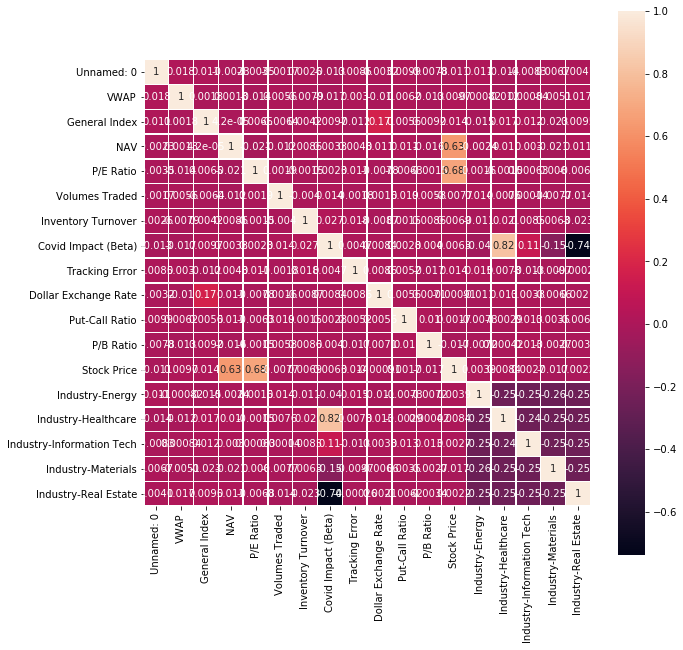

In [13]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, #vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True)
    plt.show();
    
correlation_heatmap(df)

In [16]:
columns1 = ["VWAP","General Index","NAV","P/E Ratio","Volumes Traded","Inventory Turnover","Covid Impact (Beta)","Tracking Error","Dollar Exchange Rate","Put-Call Ratio","P/B Ratio"]

for i in columns1:
    print(i)
    pearson_coef, p_value = stats.pearsonr(df[i], df['Stock Price'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    print((p_value < 0.05))
    print("------------------------------------------------------------------------------------------")

VWAP
The Pearson Correlation Coefficient is 0.00968981915924946  with a P-value of P = 0.4315180146046146
False
------------------------------------------------------------------------------------------
General Index
The Pearson Correlation Coefficient is 0.013917360607133212  with a P-value of P = 0.25855768656644196
False
------------------------------------------------------------------------------------------
NAV
The Pearson Correlation Coefficient is 0.6342119964733073  with a P-value of P = 0.0
True
------------------------------------------------------------------------------------------
P/E Ratio
The Pearson Correlation Coefficient is 0.6828209612355766  with a P-value of P = 0.0
True
------------------------------------------------------------------------------------------
Volumes Traded
The Pearson Correlation Coefficient is -0.007738916688028418  with a P-value of P = 0.5298587430385027
False
-----------------------------------------------------------------------------------

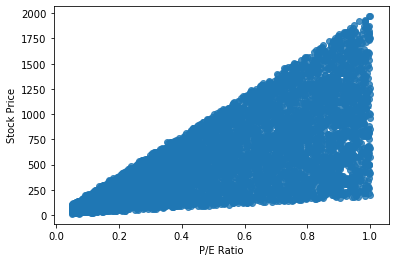

In [19]:
sns.regplot(x="P/E Ratio", y="Stock Price", data=df)

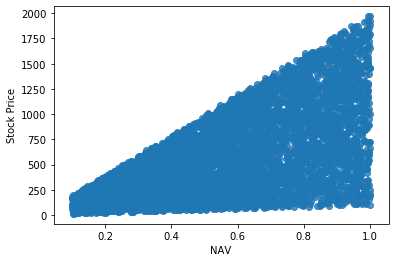

In [20]:
sns.regplot(x="NAV", y="Stock Price", data=df)

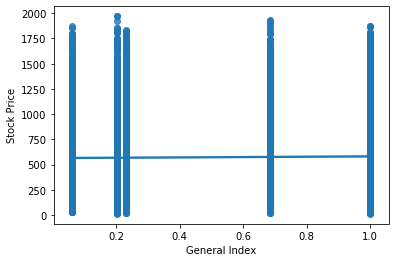

In [21]:
sns.regplot(x="General Index", y="Stock Price", data=df)

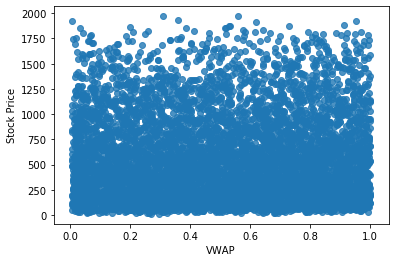

In [22]:
sns.regplot(x="VWAP", y="Stock Price", data=df)

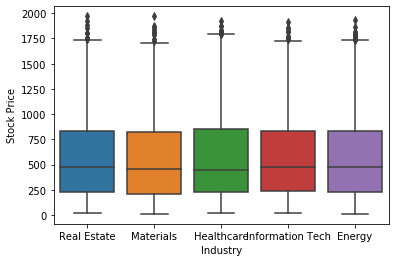

In [24]:
sns.boxplot(x="Industry", y="Stock Price", data=df)

### ANOVA TEST ON INDUSTRY VARIABLE

In [37]:
df_gptest = df[['Industry','Stock Price']]

grouped_test2=df_gptest[['Industry', 'Stock Price']].groupby(['Industry'])
grouped_test2

In [46]:

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Real Estate')['Stock Price'], grouped_test2.get_group('Materials')['Stock Price'], grouped_test2.get_group('Healthcare')['Stock Price'], grouped_test2.get_group('Information Tech')['Stock Price'], grouped_test2.get_group('Energy')['Stock Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 0.5035933451874222 , P = 0.7331154763788275


### So we've analysed the data... As we can see there is not any strong correlation between stock price and other independant variables. So we don't need to remove any feature... We are now ready to train the model

### The results shows that the linear regression model should not used to fit the data.... Rather that we should go for non- linear approach

### we can use neural network, random forest regressor or SVM regressor to train the model